In [1]:
import pandas as pd
df = pd.read_csv(r"C:/Users/joinr/OneDrive/Documents/vedika_loan_data.csv")

In [8]:
#What is the monthly trend of loan disbursals over the last year?
# Graph: Line chart (x-axis: Month, y-axis: Loan Count)

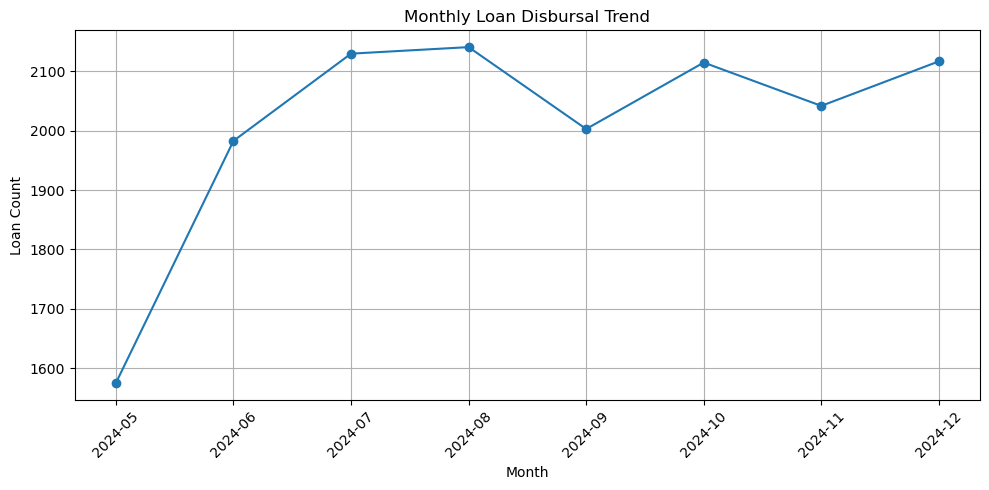

In [12]:
import matplotlib.pyplot as plt
df['Loan Disbursal Date'] = pd.to_datetime(df['Loan Disbursal Date'], errors='coerce')

df[df['Loan Disbursal Date'] >= pd.Timestamp.today() - pd.DateOffset(months=12)] \
  .assign(Month = df['Loan Disbursal Date'].dt.to_period('M').astype(str)) \
  .groupby('Month').size().plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Loan Disbursal Trend')
plt.xlabel("Month")
plt.ylabel("Loan Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 1. What’s the trend of EMI defaults over the last 12 months?
Chart: Line chart

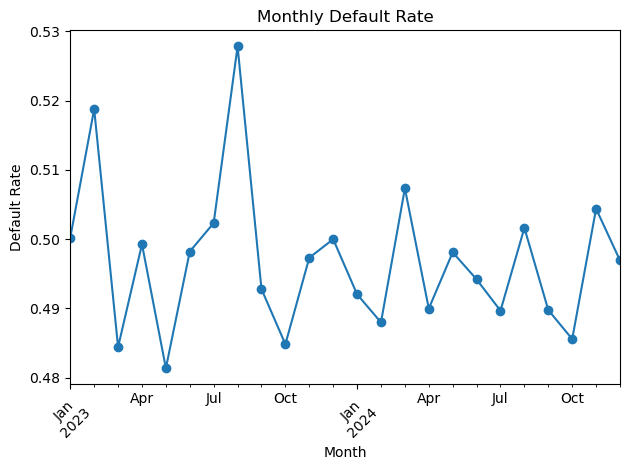

In [15]:
import matplotlib.pyplot as plt
df['Loan Disbursal Date'] = pd.to_datetime(df['Loan Disbursal Date'], errors='coerce')
df['Month'] = df['Loan Disbursal Date'].dt.to_period('M')
df['Default_Flag'] = df['Overdue Amount'] > 0
monthly_defaults = df.groupby('Month')['Default_Flag'].mean()

monthly_defaults.plot(kind='line', marker='o', title='Monthly Default Rate')
plt.ylabel('Default Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Which loan types have the highest average interest rates? #Horizontal bar chart


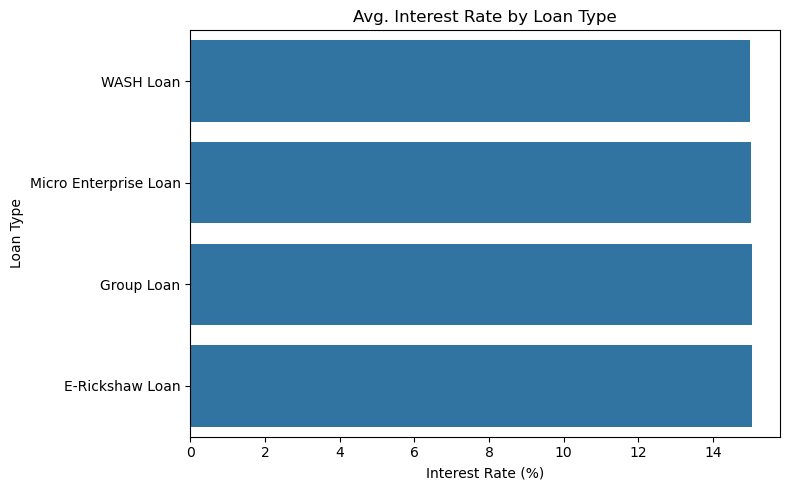

In [18]:
import seaborn as sns
avg_interest = df.groupby('Loan Type')['Interest Rate'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_interest.values, y=avg_interest.index)
plt.title("Avg. Interest Rate by Loan Type")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Loan Type")
plt.tight_layout()
plt.show()


#Which branches have the highest percentage of overdue loans?   #Bar chart

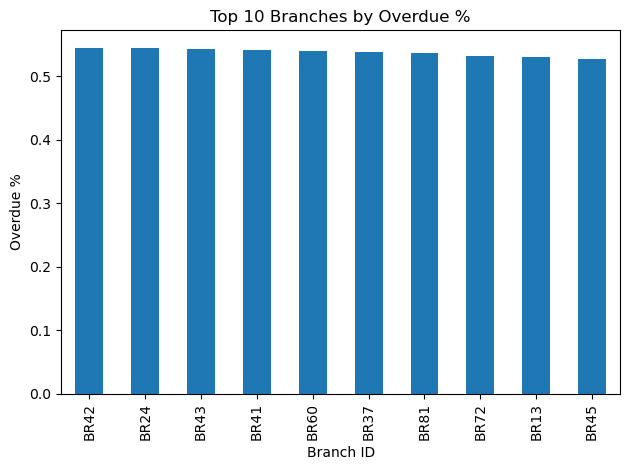

In [24]:
df['Overdue_Flag'] = df['Overdue Amount'] > 0
branch_overdue = df.groupby('Branch ID')['Overdue_Flag'].mean().sort_values(ascending=False).head(10)

branch_overdue.plot(kind='bar', title='Top 10 Branches by Overdue %')
plt.ylabel('Overdue %')
plt.xlabel('Branch ID')
plt.tight_layout()
plt.show()


Does age impact loan default?
Chart: Box plot

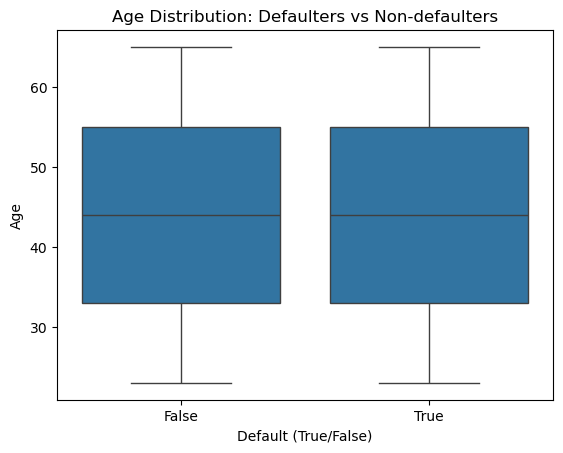

In [27]:
df['Default'] = df['Overdue Amount'] > 0
sns.boxplot(x='Default', y='Age', data=df)
plt.title("Age Distribution: Defaulters vs Non-defaulters")
plt.xlabel("Default (True/False)")
plt.ylabel("Age")
plt.show()


Compare average CIBIL scores by employment type
Chart: Bar chart

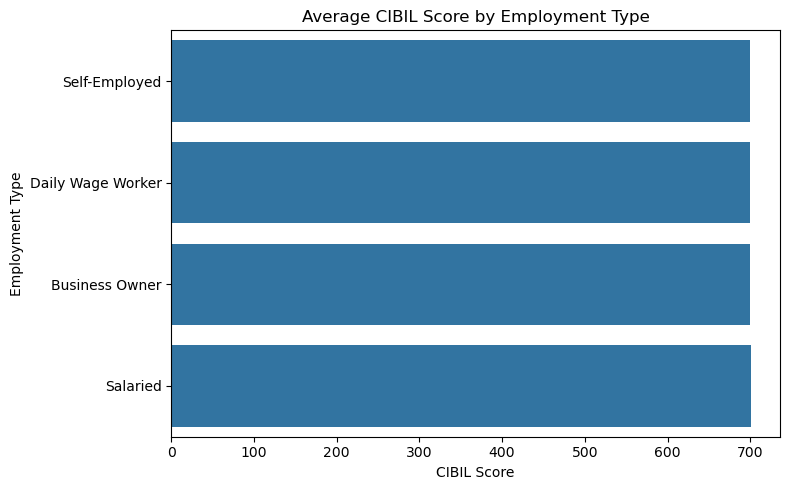

In [30]:
avg_cibil = df.groupby('Employment Type')['CIBIL Score'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_cibil.values, y=avg_cibil.index)
plt.title("Average CIBIL Score by Employment Type")
plt.xlabel("CIBIL Score")
plt.ylabel("Employment Type")
plt.tight_layout()
plt.show()
